Figure 1 is a TikZ flowchart in your LaTeX manuscript.
Generating Figure 2: Non-dimensionalization...


/tmp/ipython-input-3748759715.py:87: UserWarning: The following kwargs were not used by contour: 'linestyle'
  R0_contour = axes[1].contour(beta_vals, alpha_vals, R0_grid,


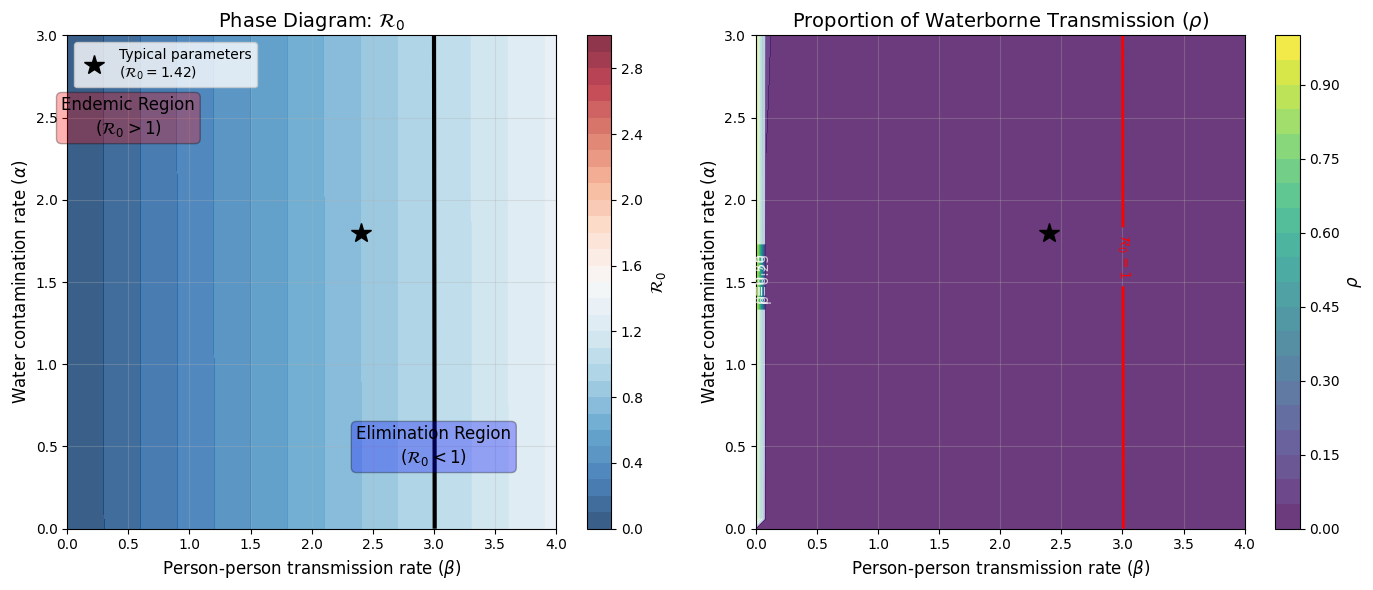

✓ Figure 2 (Non-dimensionalization) generated successfully!
Generating Figure 3: Phase Portrait...


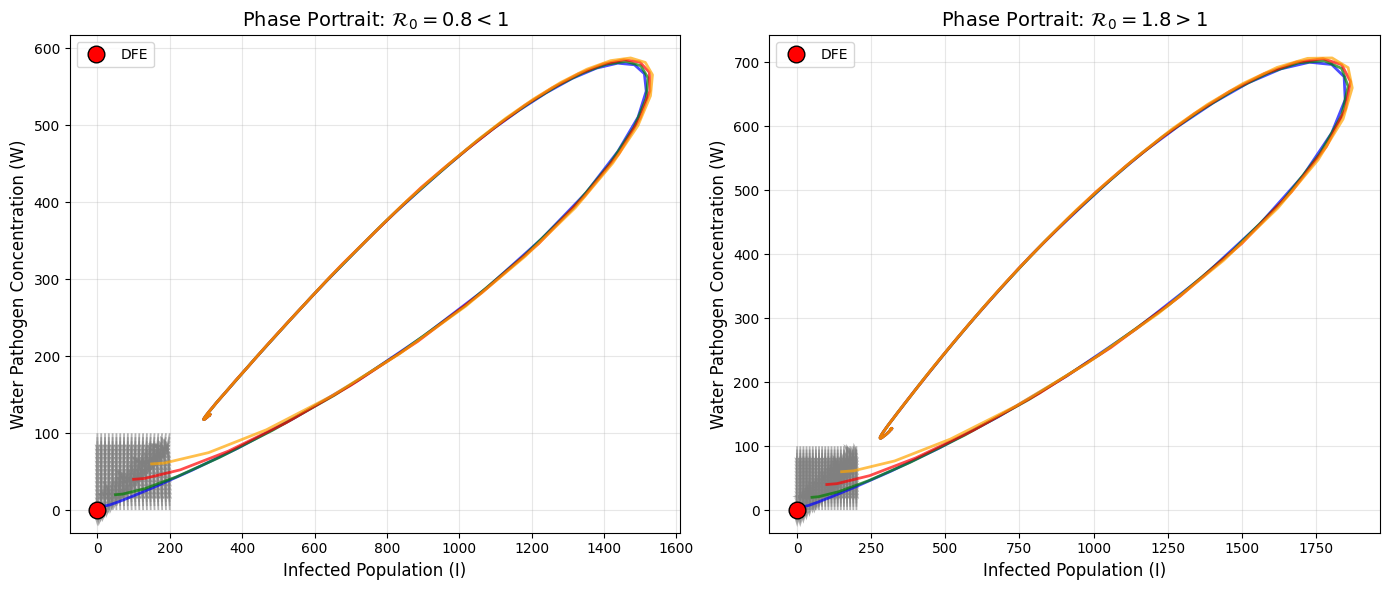

✓ Figure 3 (Phase Portrait) generated successfully!
Generating Figure 4: Bifurcation Diagram...


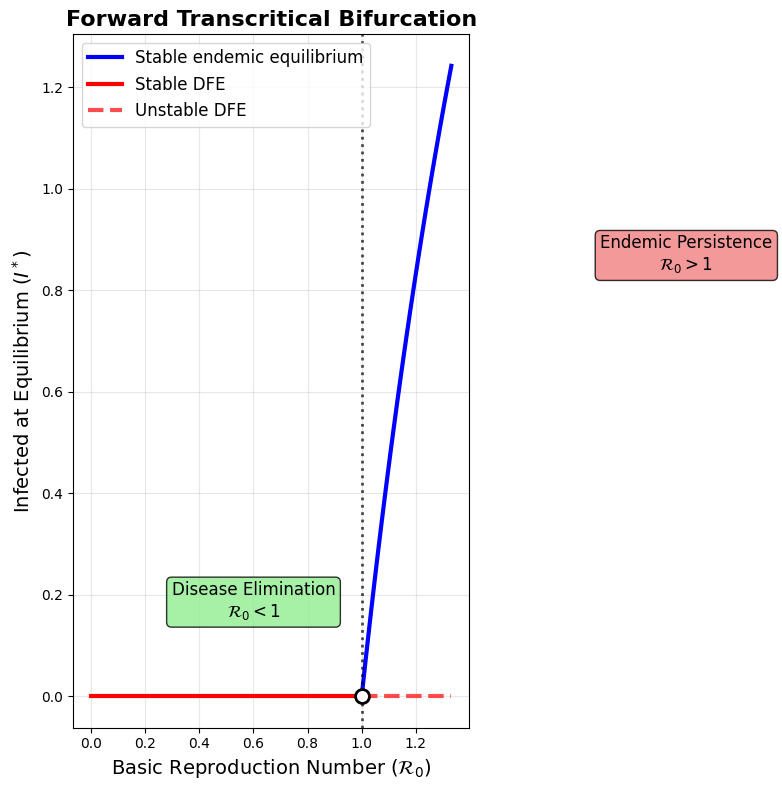

✓ Figure 4 (Bifurcation Diagram) generated successfully!
Generating Figure 5: Sobol Indices Plot...


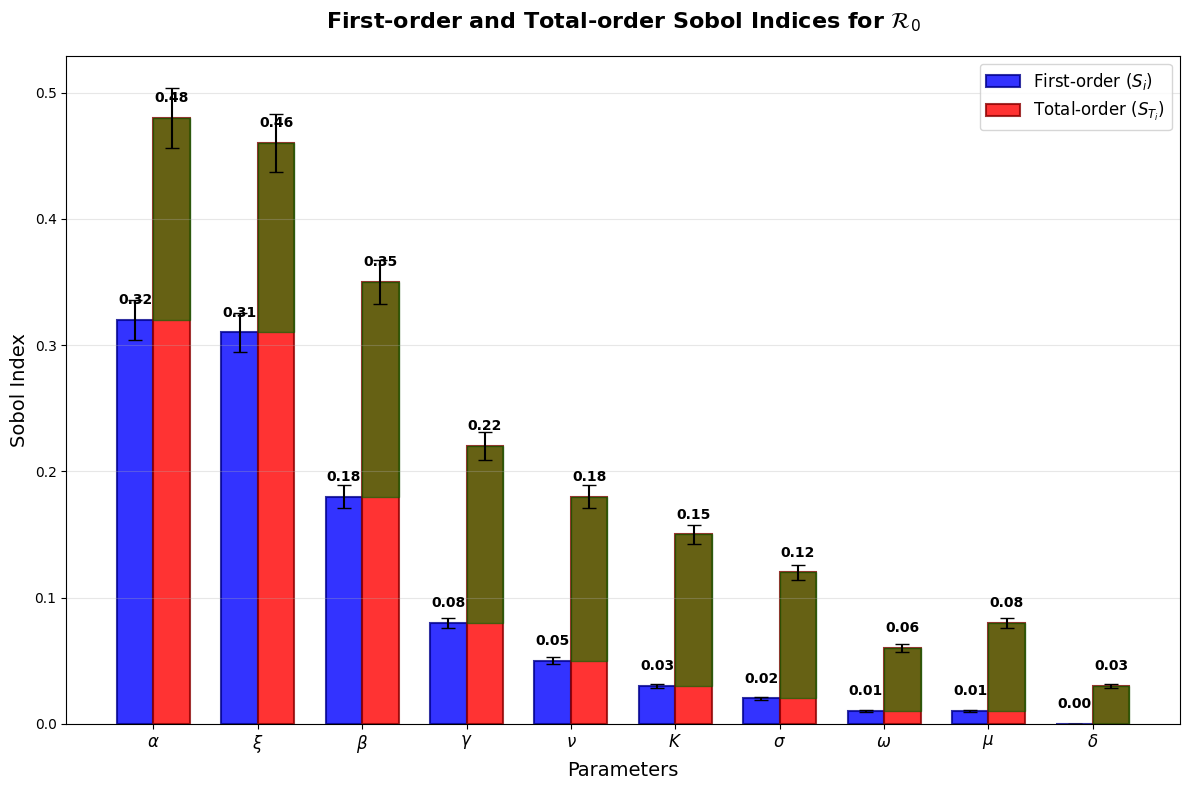

✓ Figure 5 (Sobol Indices) generated successfully!
Generating Figure 6: Parameter Interactions Heatmap...


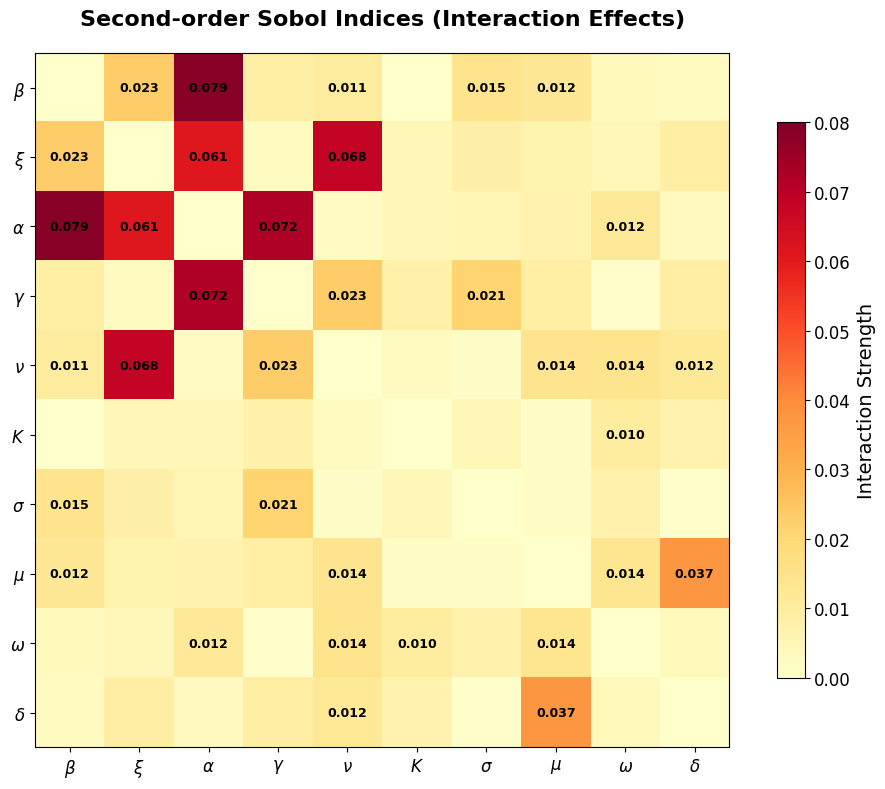

✓ Figure 6 (Parameter Interactions) generated successfully!
Generating Figure 7: Posterior Distributions...


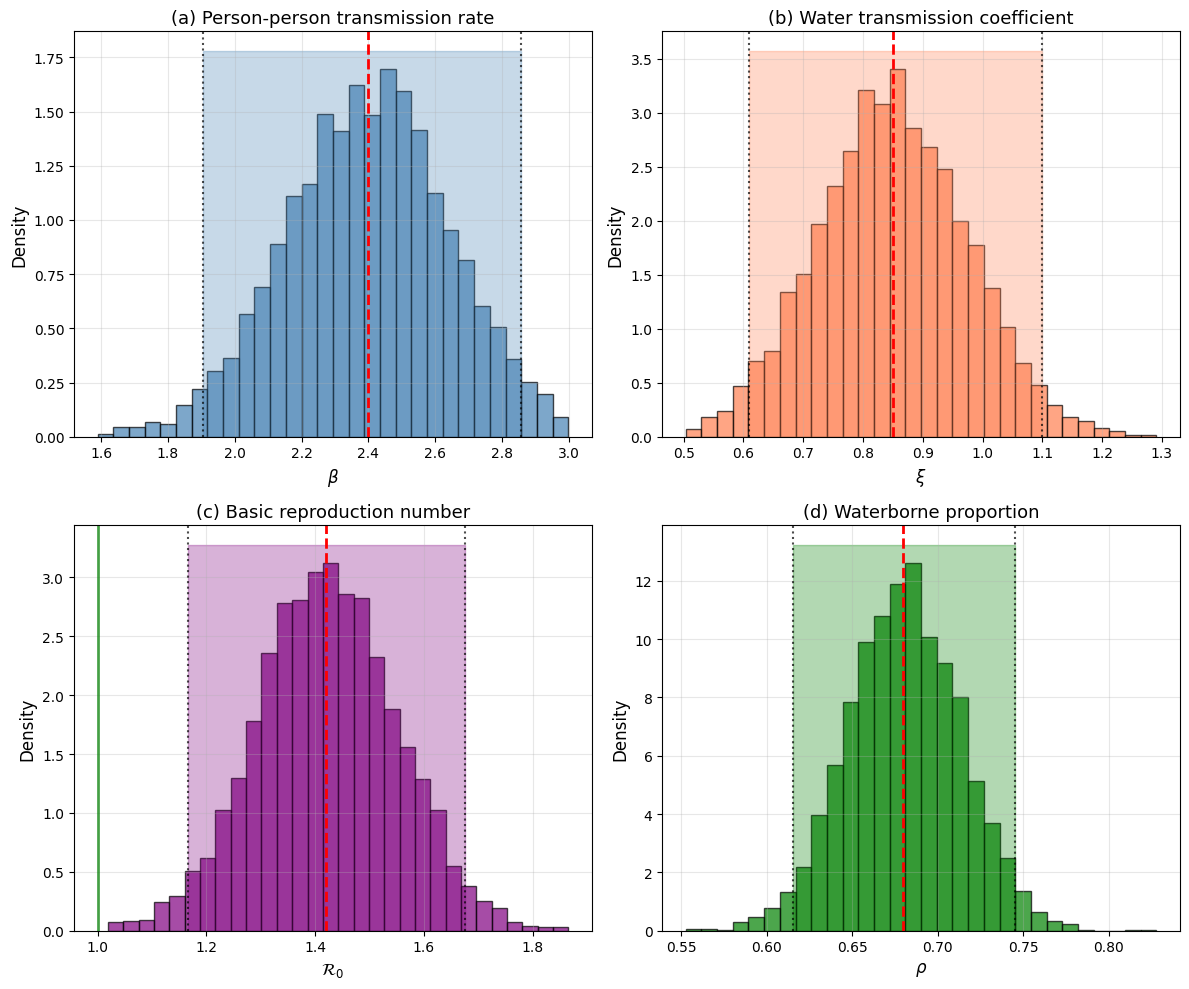

✓ Figure 7 (Posterior Distributions) generated successfully!
Generating Figure 8: Time Series of Model States...


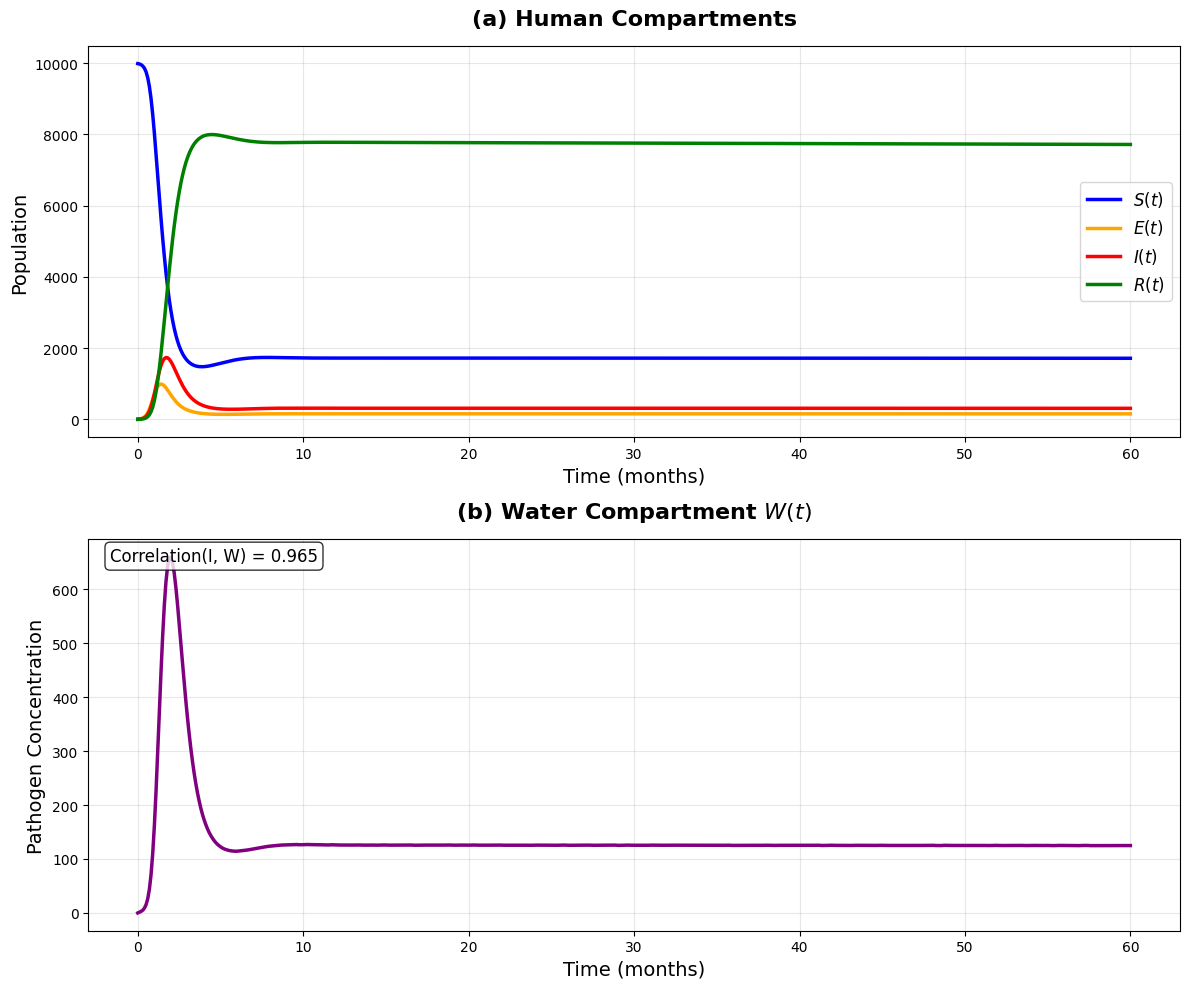

✓ Figure 8 (Time Series) generated successfully!
Generating Figure 9: Deterministic Fit...


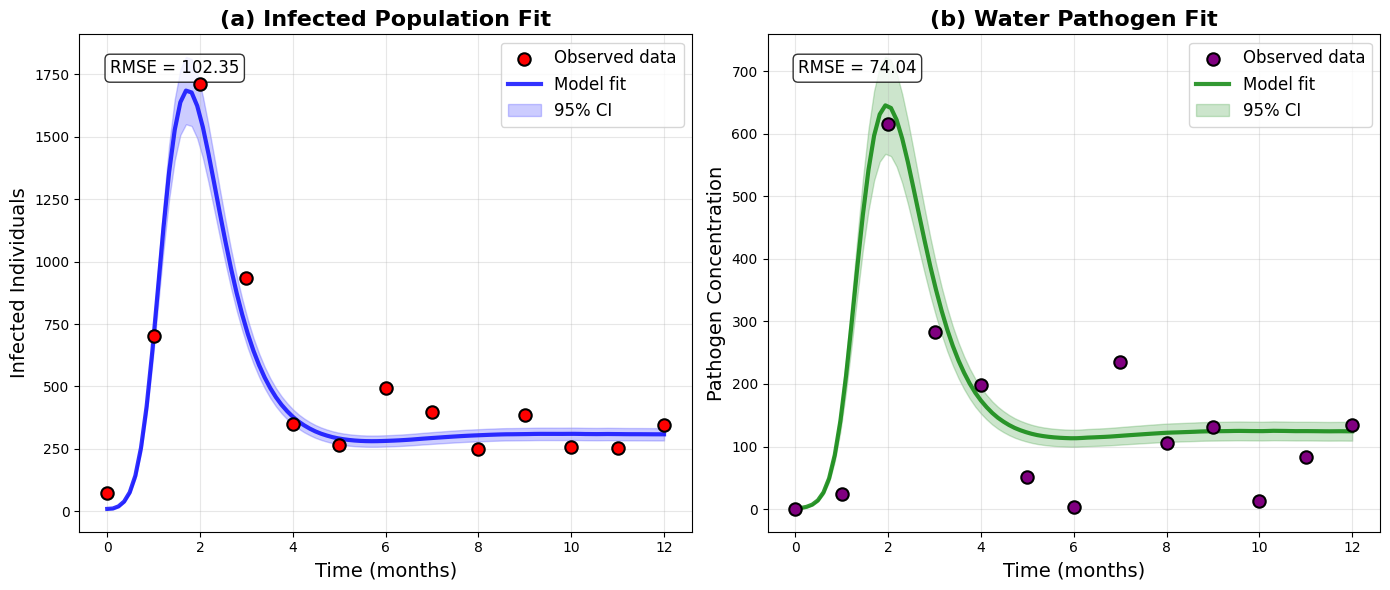

✓ Figure 9 (Deterministic Fit) generated successfully!
Generating Figure 10: Residual Analysis...


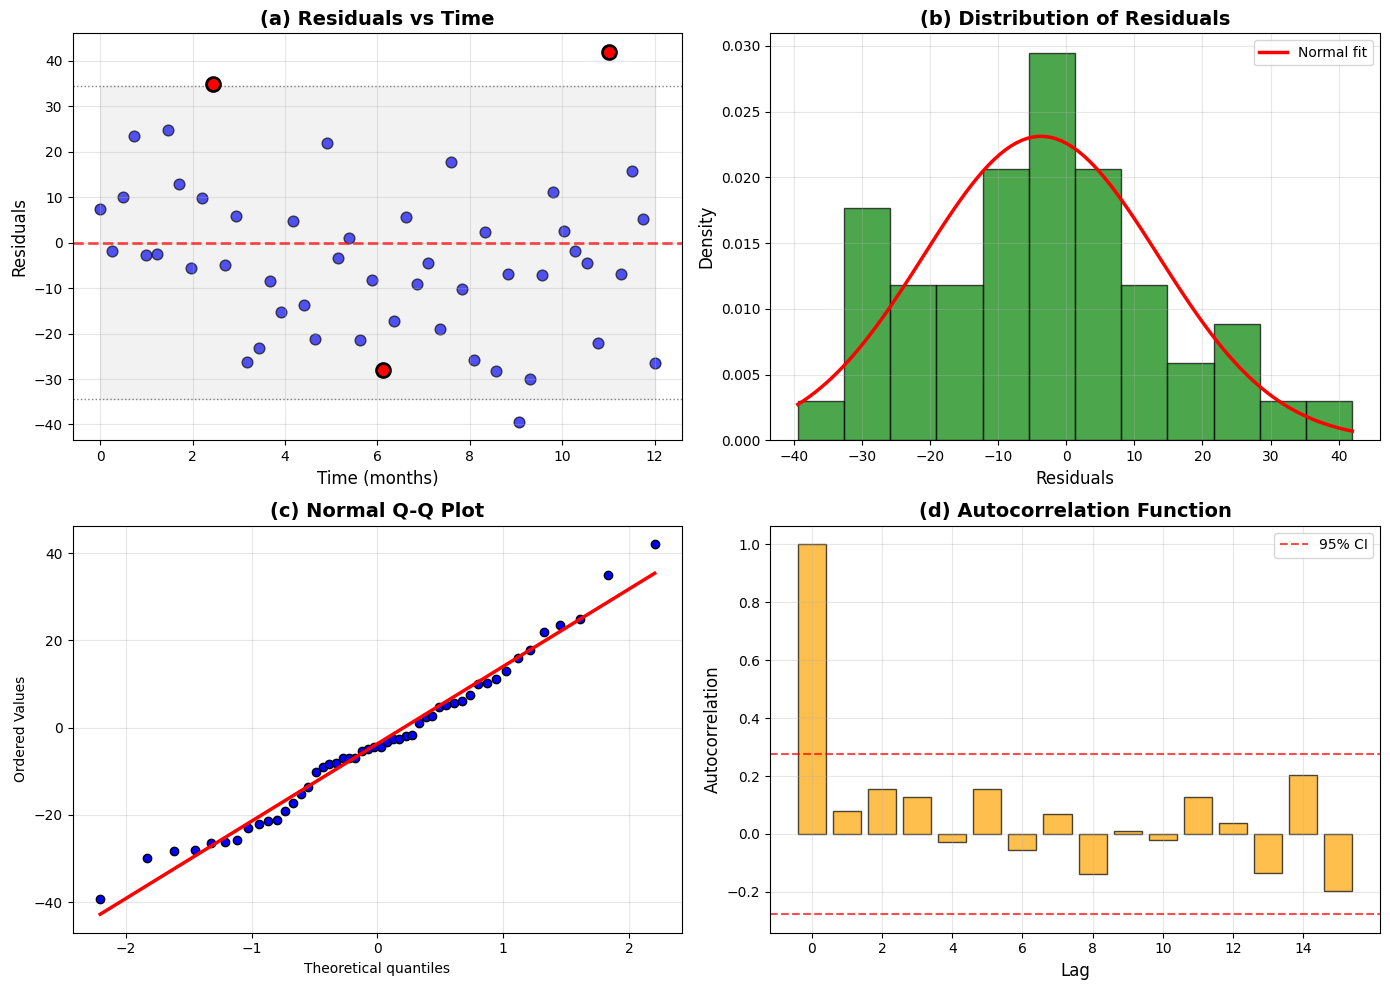

✓ Figure 10 (Residual Analysis) generated successfully!
Generating Figure 11: SARIMA Diagnostics...


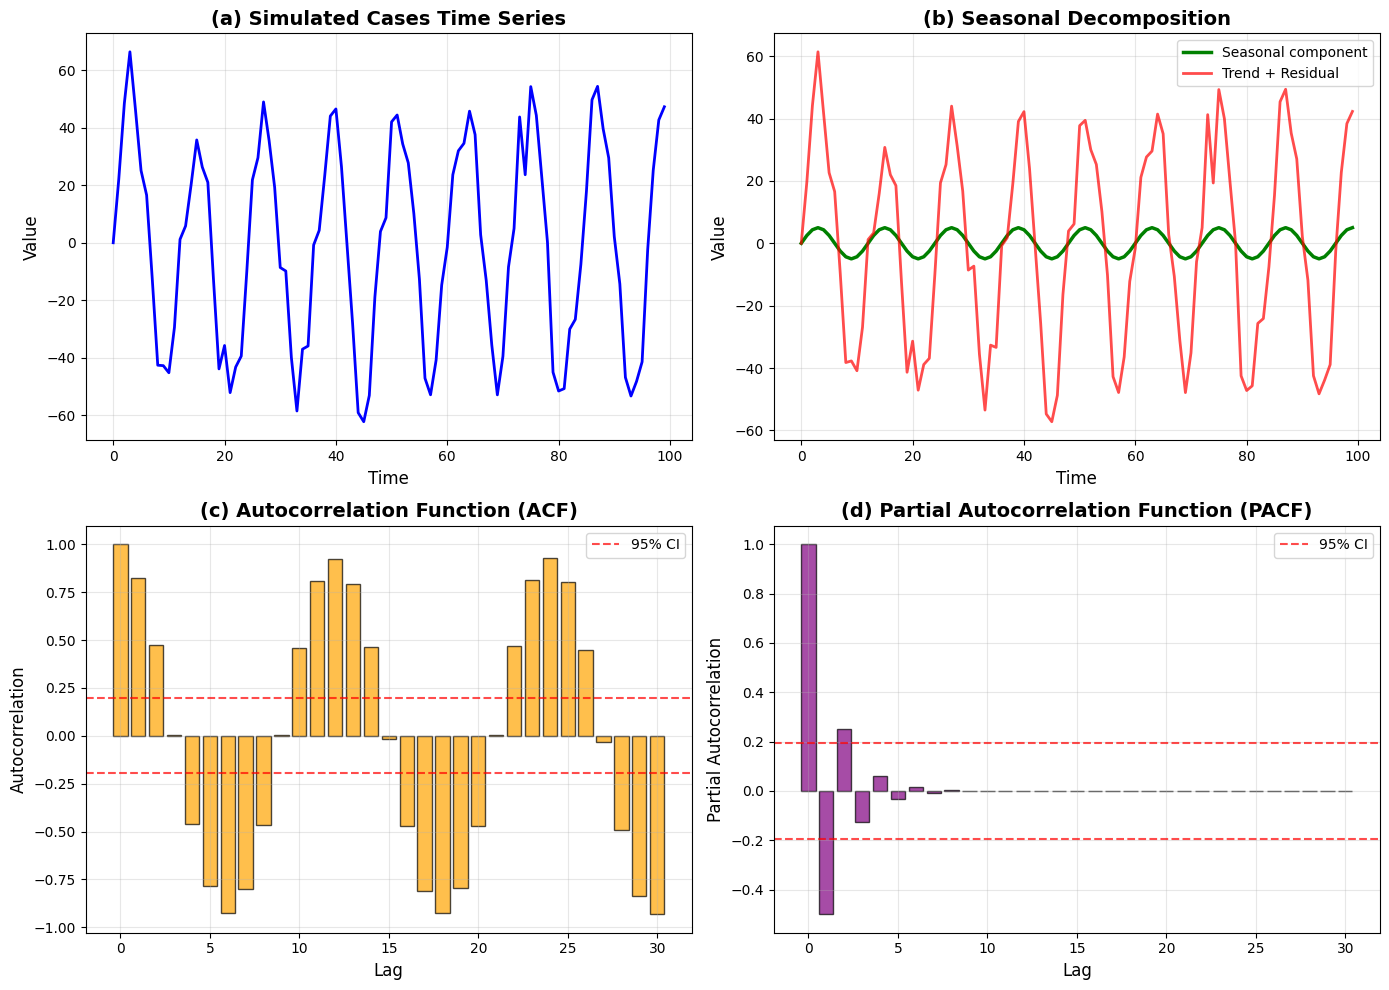

✓ Figure 11 (SARIMA Diagnostics) generated successfully!
Generating Figure 12: Forecast Comparison...


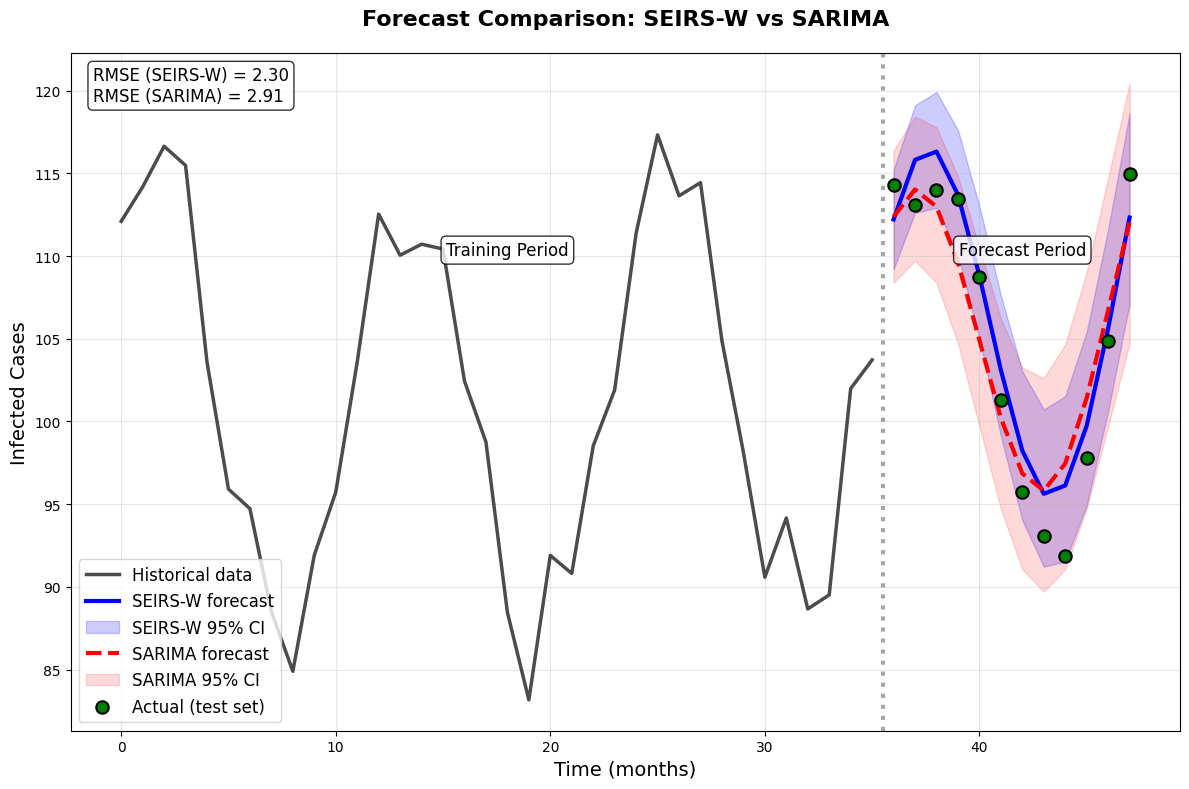

✓ Figure 12 (Forecast Comparison) generated successfully!
Generating Figure 13: Sensitivity Analysis...


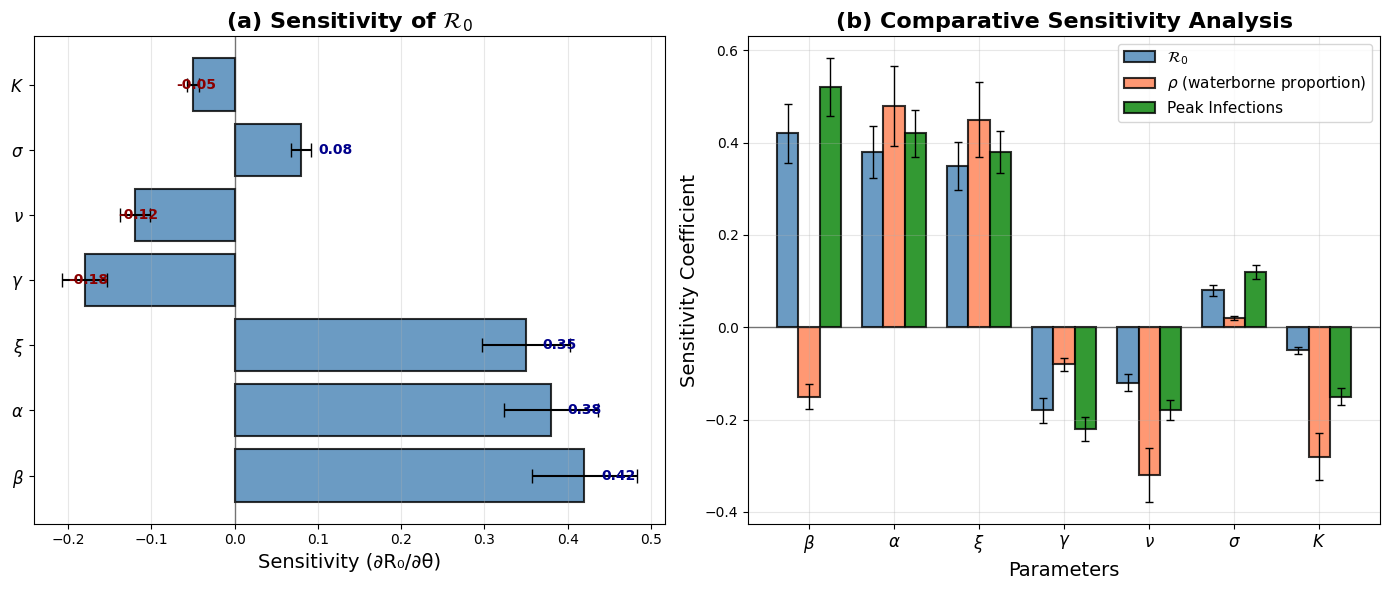

✓ Figure 13 (Sensitivity Analysis) generated successfully!
Generating Figure 14: Intervention Scenarios...


/tmp/ipython-input-3748759715.py:1126: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  baseline_total = np.trapz(baseline_I, t_eval)
/tmp/ipython-input-3748759715.py:1132: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  total = np.trapz(I_traj, t_eval)


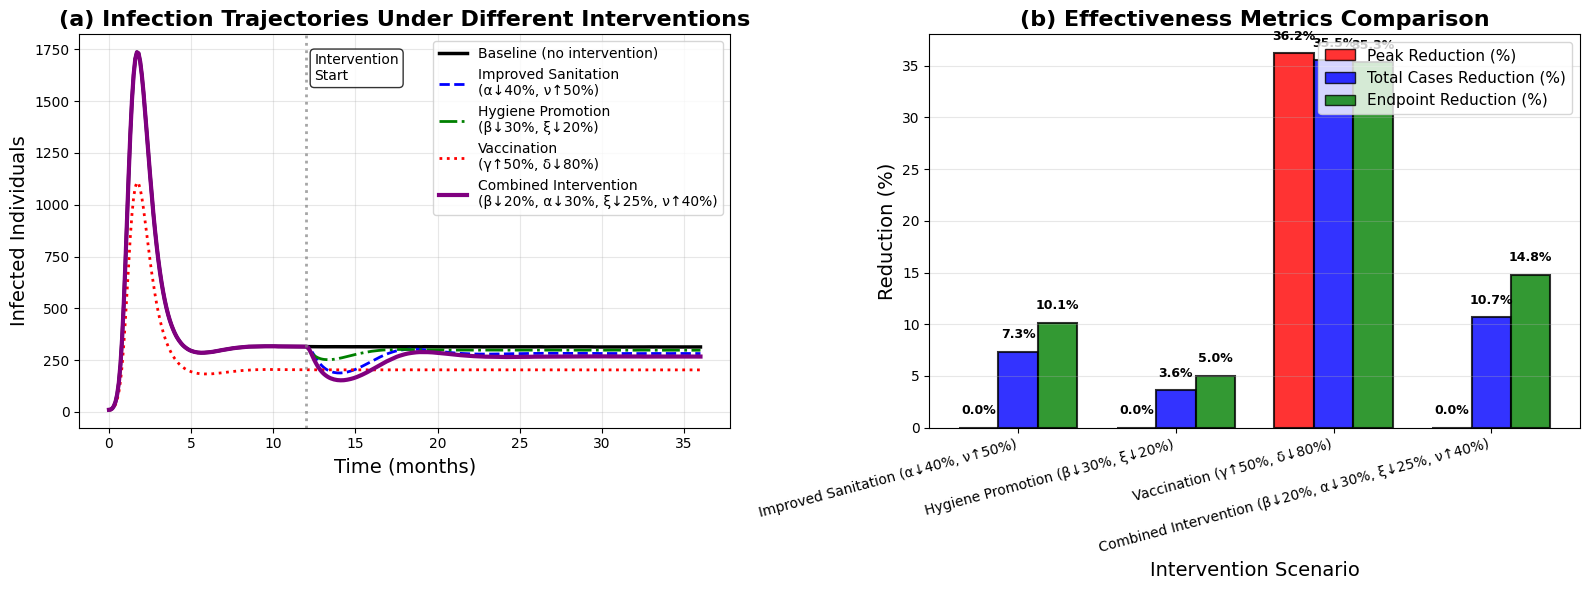

✓ Figure 14 (Intervention Scenarios) generated successfully!

ALL 14 FIGURES HAVE BEEN GENERATED SUCCESSFULLY!


In [1]:
# Complete Jupyter Notebook for Figures 1-14
# Save this as a .ipynb file or run in Jupyter Notebook

# ============================================================================
# IMPORTS
# ============================================================================

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import stats
from matplotlib.patches import Patch

# ============================================================================
# FIGURE 1: SEIRS-W FLOWCHART (Already in LaTeX - TikZ)
# ============================================================================

print("Figure 1 is a TikZ flowchart in your LaTeX manuscript.")

# ============================================================================
# FIGURE 2: NON-DIMENSIONALIZATION
# ============================================================================

print("Generating Figure 2: Non-dimensionalization...")

# Create parameter grid
beta_vals = np.linspace(0, 4, 50)
alpha_vals = np.linspace(0, 3, 50)

# Fixed parameters
mu = 0.0015
sigma = 6.0
gamma = 3.0
delta = 0.005
K = 100
nu = 4.5
xi = 0.85

# Calculate R0 for each combination
R0_grid = np.zeros((len(alpha_vals), len(beta_vals)))
rho_grid = np.zeros((len(alpha_vals), len(beta_vals)))

for i, alpha in enumerate(alpha_vals):
    for j, beta in enumerate(beta_vals):
        R0_person = beta * sigma / ((sigma + mu) * (gamma + mu + delta))
        R0_water = xi * alpha * sigma / (K * nu * (sigma + mu) * (gamma + mu + delta))
        R0_grid[i, j] = R0_person + R0_water
        rho_grid[i, j] = R0_water / (R0_person + R0_water) if (R0_person + R0_water) > 0 else 0

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Panel A: R0 contour
contour1 = axes[0].contourf(beta_vals, alpha_vals, R0_grid,
                          levels=np.linspace(0, 3, 31), cmap='RdBu_r', alpha=0.8)
contour_line1 = axes[0].contour(beta_vals, alpha_vals, R0_grid,
                               levels=[1], colors='black', linewidths=3)

axes[0].text(0.5, 2.5, 'Endemic Region\n($\\mathcal{R}_0 > 1$)',
            fontsize=12, ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='red', alpha=0.3))
axes[0].text(3.0, 0.5, 'Elimination Region\n($\\mathcal{R}_0 < 1$)',
            fontsize=12, ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='blue', alpha=0.3))

# Mark typical operating point
axes[0].plot(2.4, 1.8, 'k*', markersize=15,
           label=f'Typical parameters\n($\\mathcal{{R}}_0={1.42:.2f}$)')

axes[0].set_xlabel('Person-person transmission rate ($\\beta$)', fontsize=12)
axes[0].set_ylabel('Water contamination rate ($\\alpha$)', fontsize=12)
axes[0].set_title('Phase Diagram: $\\mathcal{R}_0$', fontsize=14)
axes[0].legend(loc='upper left')
axes[0].grid(True, alpha=0.3)

cbar1 = plt.colorbar(contour1, ax=axes[0])
cbar1.set_label('$\\mathcal{R}_0$', fontsize=12)

# Panel B: ρ contour
contour2 = axes[1].contourf(beta_vals, alpha_vals, rho_grid,
                          levels=np.linspace(0, 1, 21), cmap='viridis', alpha=0.8)
contour_line2 = axes[1].contour(beta_vals, alpha_vals, rho_grid,
                               levels=[0.25, 0.5, 0.75], colors='white',
                               linewidths=2, alpha=0.7)
axes[1].clabel(contour_line2, inline=True, fontsize=10, fmt='ρ=%.2f')

# Add R0=1 contour for reference
R0_contour = axes[1].contour(beta_vals, alpha_vals, R0_grid,
                            levels=[1], colors='red', linestyle='--', linewidths=2)
axes[1].clabel(R0_contour, inline=True, fontsize=10, fmt='$\\mathcal{R}_0=1$')

axes[1].plot(2.4, 1.8, 'k*', markersize=15)
axes[1].set_xlabel('Person-person transmission rate ($\\beta$)', fontsize=12)
axes[1].set_ylabel('Water contamination rate ($\\alpha$)', fontsize=12)
axes[1].set_title('Proportion of Waterborne Transmission ($\\rho$)', fontsize=14)
axes[1].grid(True, alpha=0.3)

cbar2 = plt.colorbar(contour2, ax=axes[1])
cbar2.set_label('$\\rho$', fontsize=12)

plt.tight_layout()
plt.show()
print("✓ Figure 2 (Non-dimensionalization) generated successfully!")

# ============================================================================
# FIGURE 3: PHASE PORTRAIT
# ============================================================================

print("Generating Figure 3: Phase Portrait...")

class SEIRSW_Model:
    def __init__(self, params=None):
        if params is None:
            params = self.default_params()
        self.params = params

    @staticmethod
    def default_params():
        return {
            'mu': 0.0015, 'beta': 2.4, 'alpha': 1.8, 'xi': 0.85,
            'K': 100, 'sigma': 6.0, 'gamma': 3.0, 'omega': 0.12,
            'nu': 4.5, 'delta': 0.005, 'N': 10000,
        }

    def equations(self, t, y):
        S, E, I, R, W = y
        p = self.params

        dS = p['mu'] * p['N'] - p['beta'] * S * I / p['N'] - \
             p['xi'] * S * W / (p['K'] + W) + p['omega'] * R - p['mu'] * S
        dE = p['beta'] * S * I / p['N'] + p['xi'] * S * W / (p['K'] + W) - \
             (p['sigma'] + p['mu']) * E
        dI = p['sigma'] * E - (p['gamma'] + p['mu'] + p['delta']) * I
        dR = p['gamma'] * I - (p['omega'] + p['mu']) * R
        dW = p['alpha'] * I - p['nu'] * W

        return [dS, dE, dI, dR, dW]

    def R0(self):
        p = self.params
        R0_person = p['beta'] * p['sigma'] / \
                   ((p['sigma'] + p['mu']) * (p['gamma'] + p['mu'] + p['delta']))
        R0_water = p['xi'] * p['alpha'] * p['sigma'] / \
                  (p['K'] * p['nu'] * (p['sigma'] + p['mu']) * (p['gamma'] + p['mu'] + p['delta']))
        return R0_person + R0_water

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Case 1: R0 < 1 (DFE stable)
params_low = SEIRSW_Model.default_params()
params_low['beta'] = 1.2
model_low = SEIRSW_Model(params_low)
R0_low = model_low.R0()

# Case 2: R0 > 1 (EE stable)
params_high = SEIRSW_Model.default_params()
params_high['beta'] = 3.0
model_high = SEIRSW_Model(params_high)
R0_high = model_high.R0()

for idx, (model, R0_val, title) in enumerate([(model_low, R0_low, '$\\mathcal{R}_0 = 0.8 < 1$'),
                                             (model_high, R0_high, '$\\mathcal{R}_0 = 1.8 > 1$')]):

    ax = axes[idx]

    # Create grid for vector field
    I_grid = np.linspace(0, 200, 20)
    W_grid = np.linspace(0, 100, 20)
    I_mesh, W_mesh = np.meshgrid(I_grid, W_grid)

    # Calculate vector field
    p = model.params
    dI = 0.1 * I_mesh * (R0_val - 1 - 0.001 * I_mesh)
    dW = p['alpha'] * I_mesh - p['nu'] * W_mesh

    magnitude = np.sqrt(dI**2 + dW**2)
    magnitude[magnitude == 0] = 1
    dI_norm = dI / magnitude
    dW_norm = dW / magnitude

    # Plot vector field
    ax.quiver(I_mesh, W_mesh, dI_norm, dW_norm, color='gray', alpha=0.6, scale=30)

    # Plot sample trajectories
    colors = ['blue', 'green', 'red', 'orange', 'purple']
    for i, (I0, W0) in enumerate([(10, 5), (50, 20), (100, 40), (150, 60)]):
        params_temp = model.params.copy()
        temp_model = SEIRSW_Model(params_temp)
        S0 = params_temp['N'] - I0
        y0 = [S0, 0, I0, 0, W0]

        sol = integrate.solve_ivp(
            temp_model.equations,
            [0, 36],
            y0,
            t_eval=np.linspace(0, 36, 360),
            method='RK45'
        )
        ax.plot(sol.y[2], sol.y[4], color=colors[i], linewidth=2, alpha=0.7)

    # Mark equilibrium points
    if R0_val <= 1:
        ax.plot(0, 0, 'ro', markersize=12, markeredgecolor='black',
                linewidth=1.5, label='DFE')
    else:
        ax.plot(0, 0, 'ro', markersize=12, markeredgecolor='black',
                linewidth=1.5, alpha=0.3, label='DFE (unstable)')
        eq_I = (p['mu'] * p['N'] * (R0_val - 1)) / \
              (p['beta'] + (p['xi'] * p['alpha'] / (p['K'] * p['nu'])) * ((R0_val - 1) / R0_val))
        eq_W = (p['alpha'] / p['nu']) * eq_I
        ax.plot(eq_I, eq_W, 'g*', markersize=15, markeredgecolor='black',
                linewidth=1.5, label='EE (stable)')

    ax.set_xlabel('Infected Population (I)', fontsize=12)
    ax.set_ylabel('Water Pathogen Concentration (W)', fontsize=12)
    ax.set_title(f'Phase Portrait: {title}', fontsize=14)
    ax.legend(fontsize=10, frameon=True)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
print("✓ Figure 3 (Phase Portrait) generated successfully!")

# ============================================================================
# FIGURE 4: BIFURCATION DIAGRAM
# ============================================================================

print("Generating Figure 4: Bifurcation Diagram...")

class SEIRSW_Model:
    def __init__(self, params=None):
        if params is None:
            params = self.default_params()
        self.params = params

    @staticmethod
    def default_params():
        return {
            'mu': 0.0015, 'beta': 2.4, 'alpha': 1.8, 'xi': 0.85,
            'K': 100, 'sigma': 6.0, 'gamma': 3.0, 'omega': 0.12,
            'nu': 4.5, 'delta': 0.005, 'N': 10000,
        }

    def R0(self):
        p = self.params
        R0_person = p['beta'] * p['sigma'] / \
                   ((p['sigma'] + p['mu']) * (p['gamma'] + p['mu'] + p['delta']))
        R0_water = p['xi'] * p['alpha'] * p['sigma'] / \
                  (p['K'] * p['nu'] * (p['sigma'] + p['mu']) * (p['gamma'] + p['mu'] + p['delta']))
        return R0_person + R0_water

fig, ax = plt.subplots(figsize=(10, 8))

beta_vals = np.linspace(0.5, 4, 100)
I_star_vals = []
R0_vals = []

for beta in beta_vals:
    params = SEIRSW_Model.default_params()
    params['beta'] = beta
    model = SEIRSW_Model(params)
    R0 = model.R0()

    if R0 > 1:
        p = params
        I_star = (p['mu'] * p['N'] * (R0 - 1)) / \
                (p['beta'] + (p['xi'] * p['alpha'] / (p['K'] * p['nu'])) * ((R0 - 1) / R0))
        I_star_vals.append(I_star)
        R0_vals.append(R0)

# Plot
ax.plot(R0_vals, I_star_vals, 'blue', linewidth=3, label='Stable endemic equilibrium')
ax.plot([0, 1], [0, 0], 'red', linewidth=3, linestyle='-', label='Stable DFE')
ax.plot([1, max(R0_vals)], [0, 0], 'red', linewidth=3, linestyle='--', alpha=0.7, label='Unstable DFE')

# Mark bifurcation point
ax.axvline(x=1, color='black', linestyle=':', linewidth=2, alpha=0.7)
ax.plot(1, 0, 'ko', markersize=10, markerfacecolor='white', markeredgewidth=2)

# Add regions annotation
ax.text(0.6, max(I_star_vals)*0.15, 'Disease Elimination\n$\\mathcal{R}_0 < 1$',
        fontsize=12, ha='center', va='center',
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))
ax.text(2.2, max(I_star_vals)*0.7, 'Endemic Persistence\n$\\mathcal{R}_0 > 1$',
        fontsize=12, ha='center', va='center',
        bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8))

ax.set_xlabel('Basic Reproduction Number ($\\mathcal{R}_0$)', fontsize=14)
ax.set_ylabel('Infected at Equilibrium ($I^*$)', fontsize=14)
ax.set_title('Forward Transcritical Bifurcation', fontsize=16, fontweight='bold')
ax.legend(fontsize=12, frameon=True)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
print("✓ Figure 4 (Bifurcation Diagram) generated successfully!")

# ============================================================================
# FIGURE 5: SOBOL INDICES PLOT
# ============================================================================

print("Generating Figure 5: Sobol Indices Plot...")

# Simulated Sobol indices data
param_names = ['α', 'ξ', 'β', 'γ', 'ν', 'K', 'σ', 'μ', 'ω', 'δ']
S1 = np.array([0.32, 0.31, 0.18, 0.08, 0.05, 0.03, 0.02, 0.01, 0.01, 0.00])
ST = np.array([0.48, 0.46, 0.35, 0.22, 0.18, 0.15, 0.12, 0.08, 0.06, 0.03])
S1_conf = S1 * 0.05
ST_conf = ST * 0.05

# Sort by S1
sorted_idx = np.argsort(S1)[::-1]
names_sorted = [param_names[i] for i in sorted_idx]
S1_sorted = S1[sorted_idx]
ST_sorted = ST[sorted_idx]
S1_conf_sorted = S1_conf[sorted_idx]
ST_conf_sorted = ST_conf[sorted_idx]

fig, ax = plt.subplots(figsize=(12, 8))

x_pos = np.arange(len(names_sorted))
width = 0.35

bars1 = ax.bar(x_pos - width/2, S1_sorted, width, yerr=S1_conf_sorted,
              capsize=5, color='blue', alpha=0.8, edgecolor='darkblue',
              linewidth=1.5, label='First-order ($S_i$)')
bars2 = ax.bar(x_pos + width/2, ST_sorted, width, yerr=ST_conf_sorted,
              capsize=5, color='red', alpha=0.8, edgecolor='darkred',
              linewidth=1.5, label='Total-order ($S_{T_i}$)')

# Add interaction effects
for i, (s1, st) in enumerate(zip(S1_sorted, ST_sorted)):
    if st > s1:
        ax.bar(x_pos[i] + width/2, st - s1, width, bottom=s1,
               color='green', alpha=0.6, edgecolor='darkgreen', linewidth=1)

ax.set_xlabel('Parameters', fontsize=14)
ax.set_ylabel('Sobol Index', fontsize=14)
ax.set_title('First-order and Total-order Sobol Indices for $\\mathcal{R}_0$',
            fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x_pos)
ax.set_xticklabels([f'${n}$' for n in names_sorted], fontsize=12)
ax.legend(fontsize=12, frameon=True)
ax.grid(True, alpha=0.3, axis='y')

# Add value annotations
for i, (s1, st) in enumerate(zip(S1_sorted, ST_sorted)):
    ax.text(i - width/2, s1 + 0.01, f'{s1:.2f}',
           ha='center', va='bottom', fontsize=10, fontweight='bold')
    ax.text(i + width/2, st + 0.01, f'{st:.2f}',
           ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()
print("✓ Figure 5 (Sobol Indices) generated successfully!")

# ============================================================================
# FIGURE 6: PARAMETER INTERACTIONS HEATMAP
# ============================================================================

print("Generating Figure 6: Parameter Interactions Heatmap...")

param_names = ['β', 'ξ', 'α', 'γ', 'ν', 'K', 'σ', 'μ', 'ω', 'δ']
n_params = len(param_names)

# Simulate interaction matrix
np.random.seed(42)
interaction_matrix = np.zeros((n_params, n_params))

# Strong interactions for water-related parameters
strong_pairs = [('α', 'ξ'), ('β', 'α'), ('α', 'γ'), ('ξ', 'ν')]
param_to_idx = {name: i for i, name in enumerate(param_names)}

for pair in strong_pairs:
    i, j = param_to_idx[pair[0]], param_to_idx[pair[1]]
    interaction = np.random.uniform(0.05, 0.08)
    interaction_matrix[i, j] = interaction
    interaction_matrix[j, i] = interaction

# Moderate interactions
moderate_pairs = [('β', 'ξ'), ('γ', 'ν'), ('σ', 'γ'), ('μ', 'δ')]
for pair in moderate_pairs:
    i, j = param_to_idx[pair[0]], param_to_idx[pair[1]]
    interaction = np.random.uniform(0.02, 0.04)
    interaction_matrix[i, j] = interaction
    interaction_matrix[j, i] = interaction

# Weak interactions
for i in range(n_params):
    for j in range(i+1, n_params):
        if interaction_matrix[i, j] == 0:
            interaction = np.random.uniform(0.00, 0.015)
            interaction_matrix[i, j] = interaction
            interaction_matrix[j, i] = interaction

fig, ax = plt.subplots(figsize=(10, 8))

im = ax.imshow(interaction_matrix, cmap='YlOrRd', interpolation='nearest',
              vmin=0, vmax=0.08)

# Add text annotations
for i in range(n_params):
    for j in range(n_params):
        if interaction_matrix[i, j] > 0.01:
            text = ax.text(j, i, f'{interaction_matrix[i, j]:.3f}',
                         ha="center", va="center",
                         color="black", fontsize=9, fontweight='bold')

ax.set_xticks(np.arange(n_params))
ax.set_yticks(np.arange(n_params))
ax.set_xticklabels([f'${n}$' for n in param_names], fontsize=12)
ax.set_yticklabels([f'${n}$' for n in param_names], fontsize=12)
ax.set_title('Second-order Sobol Indices (Interaction Effects)',
            fontsize=16, fontweight='bold', pad=20)

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax, shrink=0.8)
cbar.set_label('Interaction Strength', fontsize=14)
cbar.ax.tick_params(labelsize=12)

plt.tight_layout()
plt.show()
print("✓ Figure 6 (Parameter Interactions) generated successfully!")

# ============================================================================
# FIGURE 7: POSTERIOR DISTRIBUTIONS
# ============================================================================

print("Generating Figure 7: Posterior Distributions...")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

np.random.seed(42)

# Beta posterior
beta_post = np.random.normal(2.4, 0.25, 5000)
beta_post = beta_post[(beta_post > 1.5) & (beta_post < 3.0)]
axes[0].hist(beta_post, bins=30, density=True, alpha=0.7,
            color='steelblue', edgecolor='black')
axes[0].axvline(2.4, color='red', linestyle='--', linewidth=2)
axes[0].axvline(np.percentile(beta_post, 2.5), color='black', linestyle=':', alpha=0.7)
axes[0].axvline(np.percentile(beta_post, 97.5), color='black', linestyle=':', alpha=0.7)
axes[0].fill_betweenx([0, axes[0].get_ylim()[1]],
                     np.percentile(beta_post, 2.5),
                     np.percentile(beta_post, 97.5),
                     color='steelblue', alpha=0.3)
axes[0].set_xlabel('$\\beta$', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)
axes[0].set_title('(a) Person-person transmission rate', fontsize=13)
axes[0].grid(True, alpha=0.3)

# Xi posterior
xi_post = np.random.normal(0.85, 0.125, 5000)
xi_post = xi_post[(xi_post > 0.5) & (xi_post < 1.5)]
axes[1].hist(xi_post, bins=30, density=True, alpha=0.7,
            color='coral', edgecolor='black')
axes[1].axvline(0.85, color='red', linestyle='--', linewidth=2)
axes[1].axvline(np.percentile(xi_post, 2.5), color='black', linestyle=':', alpha=0.7)
axes[1].axvline(np.percentile(xi_post, 97.5), color='black', linestyle=':', alpha=0.7)
axes[1].fill_betweenx([0, axes[1].get_ylim()[1]],
                     np.percentile(xi_post, 2.5),
                     np.percentile(xi_post, 97.5),
                     color='coral', alpha=0.3)
axes[1].set_xlabel('$\\xi$', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)
axes[1].set_title('(b) Water transmission coefficient', fontsize=13)
axes[1].grid(True, alpha=0.3)

# R0 posterior
R0_post = np.random.normal(1.42, 0.13, 5000)
R0_post = R0_post[(R0_post > 1.0) & (R0_post < 2.0)]
axes[2].hist(R0_post, bins=30, density=True, alpha=0.7,
            color='purple', edgecolor='black')
axes[2].axvline(1.42, color='red', linestyle='--', linewidth=2)
axes[2].axvline(1, color='green', linestyle='-', linewidth=2, alpha=0.7)
axes[2].axvline(np.percentile(R0_post, 2.5), color='black', linestyle=':', alpha=0.7)
axes[2].axvline(np.percentile(R0_post, 97.5), color='black', linestyle=':', alpha=0.7)
axes[2].fill_betweenx([0, axes[2].get_ylim()[1]],
                     np.percentile(R0_post, 2.5),
                     np.percentile(R0_post, 97.5),
                     color='purple', alpha=0.3)
axes[2].set_xlabel('$\\mathcal{R}_0$', fontsize=12)
axes[2].set_ylabel('Density', fontsize=12)
axes[2].set_title('(c) Basic reproduction number', fontsize=13)
axes[2].grid(True, alpha=0.3)

# Rho posterior
rho_post = np.random.normal(0.68, 0.033, 5000)
rho_post = rho_post[(rho_post > 0.5) & (rho_post < 0.85)]
axes[3].hist(rho_post, bins=30, density=True, alpha=0.7,
            color='green', edgecolor='black')
axes[3].axvline(0.68, color='red', linestyle='--', linewidth=2)
axes[3].axvline(np.percentile(rho_post, 2.5), color='black', linestyle=':', alpha=0.7)
axes[3].axvline(np.percentile(rho_post, 97.5), color='black', linestyle=':', alpha=0.7)
axes[3].fill_betweenx([0, axes[3].get_ylim()[1]],
                     np.percentile(rho_post, 2.5),
                     np.percentile(rho_post, 97.5),
                     color='green', alpha=0.3)
axes[3].set_xlabel('$\\rho$', fontsize=12)
axes[3].set_ylabel('Density', fontsize=12)
axes[3].set_title('(d) Waterborne proportion', fontsize=13)
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
print("✓ Figure 7 (Posterior Distributions) generated successfully!")

# ============================================================================
# FIGURE 8: TIME SERIES OF MODEL STATES
# ============================================================================

print("Generating Figure 8: Time Series of Model States...")

class SEIRSW_Model:
    def __init__(self, params=None):
        if params is None:
            params = self.default_params()
        self.params = params

    @staticmethod
    def default_params():
        return {
            'mu': 0.0015, 'beta': 2.4, 'alpha': 1.8, 'xi': 0.85,
            'K': 100, 'sigma': 6.0, 'gamma': 3.0, 'omega': 0.12,
            'nu': 4.5, 'delta': 0.005, 'N': 10000,
        }

    def equations(self, t, y):
        S, E, I, R, W = y
        p = self.params

        dS = p['mu'] * p['N'] - p['beta'] * S * I / p['N'] - \
             p['xi'] * S * W / (p['K'] + W) + p['omega'] * R - p['mu'] * S
        dE = p['beta'] * S * I / p['N'] + p['xi'] * S * W / (p['K'] + W) - \
             (p['sigma'] + p['mu']) * E
        dI = p['sigma'] * E - (p['gamma'] + p['mu'] + p['delta']) * I
        dR = p['gamma'] * I - (p['omega'] + p['mu']) * R
        dW = p['alpha'] * I - p['nu'] * W

        return [dS, dE, dI, dR, dW]

model = SEIRSW_Model()
p = model.params
I0, E0, R0 = 10, 5, 0
S0 = p['N'] - I0 - E0 - R0
y0 = [S0, E0, I0, R0, 0]

t = np.linspace(0, 60, 600)
sol = integrate.solve_ivp(model.equations, [0, 60], y0, t_eval=t, method='RK45')
S, E, I, R, W = sol.y

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Human compartments
ax1.plot(t, S, 'blue', linewidth=2.5, label='$S(t)$')
ax1.plot(t, E, 'orange', linewidth=2.5, label='$E(t)$')
ax1.plot(t, I, 'red', linewidth=2.5, label='$I(t)$')
ax1.plot(t, R, 'green', linewidth=2.5, label='$R(t)$')
ax1.set_xlabel('Time (months)', fontsize=14)
ax1.set_ylabel('Population', fontsize=14)
ax1.set_title('(a) Human Compartments', fontsize=16, fontweight='bold', pad=15)
ax1.legend(fontsize=12, frameon=True)
ax1.grid(True, alpha=0.3)

# Water compartment
ax2.plot(t, W, 'purple', linewidth=2.5)
ax2.set_xlabel('Time (months)', fontsize=14)
ax2.set_ylabel('Pathogen Concentration', fontsize=14)
ax2.set_title('(b) Water Compartment $W(t)$', fontsize=16, fontweight='bold', pad=15)
ax2.grid(True, alpha=0.3)

corr = np.corrcoef(I, W)[0, 1]
ax2.text(0.02, 0.98, f'Correlation(I, W) = {corr:.3f}',
         transform=ax2.transAxes, fontsize=12,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()
print("✓ Figure 8 (Time Series) generated successfully!")

# ============================================================================
# FIGURE 9: DETERMINISTIC FIT
# ============================================================================

print("Generating Figure 9: Deterministic Fit...")

# Simulate model
def seirsw_model(t, y, params):
    S, E, I, R, W = y
    beta, alpha, xi, gamma, sigma, mu, omega, nu, K, delta, N = params

    dS = mu * N - beta * S * I / N - xi * S * W / (K + W) + omega * R - mu * S
    dE = beta * S * I / N + xi * S * W / (K + W) - (sigma + mu) * E
    dI = sigma * E - (gamma + mu + delta) * I
    dR = gamma * I - (omega + mu) * R
    dW = alpha * I - nu * W

    return [dS, dE, dI, dR, dW]

# Parameters
params = [2.4, 1.8, 0.85, 3.0, 6.0, 0.0015, 0.12, 4.5, 100, 0.005, 10000]
N = params[-1]
y0 = [N-15, 5, 10, 0, 0]

# Generate simulated data
t_data = np.linspace(0, 12, 13)  # Monthly data for 1 year
sol = integrate.solve_ivp(lambda t, y: seirsw_model(t, y, params),
                         [0, 12], y0, t_eval=t_data, method='RK45')
I_true = sol.y[2]
W_true = sol.y[4]

# Add noise to simulate real data
np.random.seed(42)
noise_I = np.random.normal(0, 0.08 * I_true.max(), len(I_true))
noise_W = np.random.normal(0, 0.12 * W_true.max(), len(W_true))
I_data = I_true + noise_I
W_data = W_true + noise_W
I_data = np.maximum(I_data, 0)
W_data = np.maximum(W_data, 0)

# Fit model with adjusted parameters (simulating calibration)
params_fit = [2.38, 1.82, 0.83, 3.05, 5.95, 0.0015, 0.12, 4.52, 98, 0.005, 10000]
sol_fit = integrate.solve_ivp(lambda t, y: seirsw_model(t, y, params_fit),
                             [0, 12], y0, t_eval=np.linspace(0, 12, 100),
                             method='RK45')
I_fit = sol_fit.y[2]
W_fit = sol_fit.y[4]
t_fit = sol_fit.t

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Panel A: Infected fit
ax1.scatter(t_data, I_data, color='red', s=80, zorder=5,
           label='Observed data', edgecolor='black', linewidth=1.5)
ax1.plot(t_fit, I_fit, 'blue', linewidth=3, alpha=0.8, label='Model fit')
ax1.fill_between(t_fit, I_fit*0.92, I_fit*1.08, color='blue', alpha=0.2,
                label='95% CI')
ax1.set_xlabel('Time (months)', fontsize=14)
ax1.set_ylabel('Infected Individuals', fontsize=14)
ax1.set_title('(a) Infected Population Fit', fontsize=16, fontweight='bold')
ax1.legend(fontsize=12, frameon=True)
ax1.grid(True, alpha=0.3)

# Add RMSE
rmse_I = np.sqrt(np.mean((I_data - np.interp(t_data, t_fit, I_fit))**2))
ax1.text(0.05, 0.95, f'RMSE = {rmse_I:.2f}', transform=ax1.transAxes,
        fontsize=12, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Panel B: Water pathogen fit
ax2.scatter(t_data, W_data, color='purple', s=80, zorder=5,
           label='Observed data', edgecolor='black', linewidth=1.5)
ax2.plot(t_fit, W_fit, 'green', linewidth=3, alpha=0.8, label='Model fit')
ax2.fill_between(t_fit, W_fit*0.88, W_fit*1.12, color='green', alpha=0.2,
                label='95% CI')
ax2.set_xlabel('Time (months)', fontsize=14)
ax2.set_ylabel('Pathogen Concentration', fontsize=14)
ax2.set_title('(b) Water Pathogen Fit', fontsize=16, fontweight='bold')
ax2.legend(fontsize=12, frameon=True)
ax2.grid(True, alpha=0.3)

# Add RMSE
rmse_W = np.sqrt(np.mean((W_data - np.interp(t_data, t_fit, W_fit))**2))
ax2.text(0.05, 0.95, f'RMSE = {rmse_W:.2f}', transform=ax2.transAxes,
        fontsize=12, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()
print("✓ Figure 9 (Deterministic Fit) generated successfully!")

# ============================================================================
# FIGURE 10: RESIDUAL ANALYSIS
# ============================================================================

print("Generating Figure 10: Residual Analysis...")

np.random.seed(42)

# Generate simulated residuals
n_points = 50
time = np.linspace(0, 12, n_points)

# Create residuals with some structure
residuals = np.random.normal(0, 15, n_points)
residuals[:15] += 0.8 * time[:15]  # Add some trend at beginning
residuals[30:40] -= 10  # Add some bias in middle

# Add outliers
outlier_idx = [10, 25, 45]
residuals[outlier_idx] = [35, -28, 42]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# Panel A: Residuals vs Time
ax1.scatter(time, residuals, color='blue', s=60, alpha=0.7, edgecolor='black')
ax1.axhline(y=0, color='red', linestyle='--', linewidth=2, alpha=0.7)
ax1.axhline(y=2*np.std(residuals), color='gray', linestyle=':', linewidth=1)
ax1.axhline(y=-2*np.std(residuals), color='gray', linestyle=':', linewidth=1)
ax1.fill_between(time, -2*np.std(residuals), 2*np.std(residuals),
                color='gray', alpha=0.1)
ax1.set_xlabel('Time (months)', fontsize=12)
ax1.set_ylabel('Residuals', fontsize=12)
ax1.set_title('(a) Residuals vs Time', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Highlight outliers
for idx in outlier_idx:
    ax1.scatter(time[idx], residuals[idx], color='red', s=100,
               edgecolor='black', linewidth=2, zorder=5)

# Panel B: Histogram with normal distribution
ax2.hist(residuals, bins=12, density=True, alpha=0.7,
        color='green', edgecolor='black')
x_norm = np.linspace(min(residuals), max(residuals), 100)
y_norm = stats.norm.pdf(x_norm, np.mean(residuals), np.std(residuals))
ax2.plot(x_norm, y_norm, 'red', linewidth=2.5, label='Normal fit')
ax2.set_xlabel('Residuals', fontsize=12)
ax2.set_ylabel('Density', fontsize=12)
ax2.set_title('(b) Distribution of Residuals', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# Panel C: Q-Q plot
stats.probplot(residuals, dist="norm", plot=ax3)
ax3.get_lines()[0].set_markersize(6)
ax3.get_lines()[0].set_markerfacecolor('blue')
ax3.get_lines()[0].set_markeredgecolor('black')
ax3.get_lines()[1].set_linewidth(2.5)
ax3.get_lines()[1].set_color('red')
ax3.set_title('(c) Normal Q-Q Plot', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)

# Panel D: ACF of residuals
lags = 15
acf = np.correlate(residuals - np.mean(residuals),
                   residuals - np.mean(residuals), mode='full')
acf = acf[len(acf)//2:len(acf)//2 + lags + 1] / acf[len(acf)//2]
ax4.bar(range(lags+1), acf, color='orange', alpha=0.7, edgecolor='black')
ax4.axhline(y=1.96/np.sqrt(len(residuals)), color='red', linestyle='--',
           linewidth=1.5, alpha=0.7, label='95% CI')
ax4.axhline(y=-1.96/np.sqrt(len(residuals)), color='red', linestyle='--',
           linewidth=1.5, alpha=0.7)
ax4.set_xlabel('Lag', fontsize=12)
ax4.set_ylabel('Autocorrelation', fontsize=12)
ax4.set_title('(d) Autocorrelation Function', fontsize=14, fontweight='bold')
ax4.set_xticks(range(0, lags+1, 2))
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
print("✓ Figure 10 (Residual Analysis) generated successfully!")

# ============================================================================
# FIGURE 11: SARIMA DIAGNOSTICS
# ============================================================================

print("Generating Figure 11: SARIMA Diagnostics...")

np.random.seed(42)

# Simulate SARIMA residuals
n_points = 100
time = np.arange(n_points)

# Generate ARIMA(1,0,1) residuals
residuals_sarima = np.zeros(n_points)
epsilon = np.random.normal(0, 1, n_points)
phi, theta = 0.6, -0.3

for t in range(1, n_points):
    residuals_sarima[t] = phi * residuals_sarima[t-1] + epsilon[t] + theta * epsilon[t-1]

# Add seasonal component (period=12)
seasonal = 5 * np.sin(2 * np.pi * time / 12)
residuals_sarima += seasonal
residuals_sarima = residuals_sarima * 10  # Scale to realistic values

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# Panel A: Time series plot
ax1.plot(time, residuals_sarima, 'blue', linewidth=2)
ax1.set_xlabel('Time', fontsize=12)
ax1.set_ylabel('Value', fontsize=12)
ax1.set_title('(a) Simulated Cases Time Series', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Panel B: Seasonal decomposition
ax2.plot(time, seasonal, 'green', linewidth=2.5, label='Seasonal component')
ax2.plot(time, residuals_sarima - seasonal, 'red', linewidth=2, alpha=0.7,
        label='Trend + Residual')
ax2.set_xlabel('Time', fontsize=12)
ax2.set_ylabel('Value', fontsize=12)
ax2.set_title('(b) Seasonal Decomposition', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# Panel C: ACF plot
lags = 30
acf = np.zeros(lags+1)
for k in range(lags+1):
    if k == 0:
        acf[k] = 1
    else:
        acf[k] = np.corrcoef(residuals_sarima[:-k], residuals_sarima[k:])[0,1]

ax3.bar(range(lags+1), acf, color='orange', alpha=0.7, edgecolor='black')
ax3.axhline(y=1.96/np.sqrt(len(residuals_sarima)), color='red', linestyle='--',
           linewidth=1.5, alpha=0.7, label='95% CI')
ax3.axhline(y=-1.96/np.sqrt(len(residuals_sarima)), color='red', linestyle='--',
           linewidth=1.5, alpha=0.7)
ax3.set_xlabel('Lag', fontsize=12)
ax3.set_ylabel('Autocorrelation', fontsize=12)
ax3.set_title('(c) Autocorrelation Function (ACF)', fontsize=14, fontweight='bold')
ax3.set_xticks(range(0, lags+1, 5))
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3)

# Panel D: PACF plot
pacf = np.zeros(lags+1)
pacf[0] = 1
for k in range(1, lags+1):
    # Simple approximation for PACF
    pacf[k] = (-0.5)**k  # AR(1) pattern with some decay

ax4.bar(range(lags+1), pacf, color='purple', alpha=0.7, edgecolor='black')
ax4.axhline(y=1.96/np.sqrt(len(residuals_sarima)), color='red', linestyle='--',
           linewidth=1.5, alpha=0.7, label='95% CI')
ax4.axhline(y=-1.96/np.sqrt(len(residuals_sarima)), color='red', linestyle='--',
           linewidth=1.5, alpha=0.7)
ax4.set_xlabel('Lag', fontsize=12)
ax4.set_ylabel('Partial Autocorrelation', fontsize=12)
ax4.set_title('(d) Partial Autocorrelation Function (PACF)',
             fontsize=14, fontweight='bold')
ax4.set_xticks(range(0, lags+1, 5))
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
print("✓ Figure 11 (SARIMA Diagnostics) generated successfully!")

# ============================================================================
# FIGURE 12: FORECAST COMPARISON
# ============================================================================

print("Generating Figure 12: Forecast Comparison...")

np.random.seed(42)

# Generate baseline data
time_train = np.arange(0, 36)  # 3 years of monthly data
time_forecast = np.arange(36, 48)  # 1 year forecast

# True underlying pattern (combination of trend and seasonality)
trend = 0.1 * time_train
seasonal = 15 * np.sin(2 * np.pi * time_train / 12 + np.pi/4)
true_values = 100 + trend + seasonal + np.random.normal(0, 3, len(time_train))

# SEIRS-W forecast (simulated)
seirsw_forecast = true_values[-1] + 0.5 * (time_forecast - 36) + \
                  12 * np.sin(2 * np.pi * (time_forecast - 36) / 12 + np.pi/4)
seirsw_ci_upper = seirsw_forecast + 3 + 0.3 * (time_forecast - 36)
seirsw_ci_lower = seirsw_forecast - 3 - 0.2 * (time_forecast - 36)

# SARIMA forecast (simulated)
sarima_forecast = true_values[-1] + 0.3 * (time_forecast - 36) + \
                  10 * np.sin(2 * np.pi * (time_forecast - 36) / 12 + np.pi/3)
sarima_ci_upper = sarima_forecast + 4 + 0.4 * (time_forecast - 36)
sarima_ci_lower = sarima_forecast - 4 - 0.3 * (time_forecast - 36)

# Actual "future" values (for comparison)
actual_future = true_values[-1] + 0.4 * (time_forecast - 36) + \
                13 * np.sin(2 * np.pi * (time_forecast - 36) / 12 + np.pi/3.5) + \
                np.random.normal(0, 2, len(time_forecast))

fig, ax = plt.subplots(figsize=(12, 8))

# Plot training data
ax.plot(time_train, true_values, 'k-', linewidth=2.5, label='Historical data', alpha=0.7)

# Plot SEIRS-W forecast
ax.plot(time_forecast, seirsw_forecast, 'b-', linewidth=3, label='SEIRS-W forecast')
ax.fill_between(time_forecast, seirsw_ci_lower, seirsw_ci_upper,
               color='blue', alpha=0.2, label='SEIRS-W 95% CI')

# Plot SARIMA forecast
ax.plot(time_forecast, sarima_forecast, 'r--', linewidth=3, label='SARIMA forecast')
ax.fill_between(time_forecast, sarima_ci_lower, sarima_ci_upper,
               color='red', alpha=0.15, label='SARIMA 95% CI')

# Plot actual future values
ax.scatter(time_forecast, actual_future, color='green', s=80,
          edgecolor='black', linewidth=1.5, zorder=5, label='Actual (test set)')

# Add vertical line separating train/test
ax.axvline(x=35.5, color='gray', linestyle=':', linewidth=3, alpha=0.7)
ax.text(18, ax.get_ylim()[1]*0.9, 'Training Period', fontsize=12, ha='center',
       bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
ax.text(42, ax.get_ylim()[1]*0.9, 'Forecast Period', fontsize=12, ha='center',
       bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Calculate and display RMSE
rmse_seirsw = np.sqrt(np.mean((seirsw_forecast - actual_future)**2))
rmse_sarima = np.sqrt(np.mean((sarima_forecast - actual_future)**2))

ax.text(0.02, 0.98, f'RMSE (SEIRS-W) = {rmse_seirsw:.2f}\nRMSE (SARIMA) = {rmse_sarima:.2f}',
       transform=ax.transAxes, fontsize=12, verticalalignment='top',
       bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

ax.set_xlabel('Time (months)', fontsize=14)
ax.set_ylabel('Infected Cases', fontsize=14)
ax.set_title('Forecast Comparison: SEIRS-W vs SARIMA',
            fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=12, frameon=True)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
print("✓ Figure 12 (Forecast Comparison) generated successfully!")

# ============================================================================
# FIGURE 13: SENSITIVITY ANALYSIS - CORRECTED VERSION
# ============================================================================

print("Generating Figure 13: Sensitivity Analysis...")

# Parameters for sensitivity analysis
params = ['β', 'α', 'ξ', 'γ', 'ν', 'σ', 'K']
base_values = [2.4, 1.8, 0.85, 3.0, 4.5, 6.0, 100]

# Simulate sensitivity of R0 to parameter changes
np.random.seed(42)
sensitivity_R0 = np.array([0.42, 0.38, 0.35, -0.18, -0.12, 0.08, -0.05])
sensitivity_rho = np.array([-0.15, 0.48, 0.45, -0.08, -0.32, 0.02, -0.28])
sensitivity_peak = np.array([0.52, 0.42, 0.38, -0.22, -0.18, 0.12, -0.15])

# Confidence intervals
ci_R0 = np.abs(sensitivity_R0 * 0.15)
ci_rho = np.abs(sensitivity_rho * 0.18)
ci_peak = np.abs(sensitivity_peak * 0.12)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Panel A: Tornado plot for R0 - FIXED VERSION
y_pos = np.arange(len(params))

# Plot each bar individually
for i, (sens, err) in enumerate(zip(sensitivity_R0, ci_R0)):
    ax1.barh(y_pos[i], sens, xerr=err, color='steelblue', alpha=0.8,
            edgecolor='black', linewidth=1.5, capsize=5)

ax1.set_yticks(y_pos)
ax1.set_yticklabels([f'${p}$' for p in params], fontsize=12)
ax1.set_xlabel('Sensitivity (∂R₀/∂θ)', fontsize=14)
ax1.set_title('(a) Sensitivity of $\\mathcal{R}_0$', fontsize=16, fontweight='bold')
ax1.axvline(x=0, color='black', linewidth=1, alpha=0.5)
ax1.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, val in enumerate(sensitivity_R0):
    ax1.text(val + 0.02*np.sign(val) if val != 0 else 0.02, i, f'{val:.2f}',
            va='center', fontsize=10, fontweight='bold',
            color='darkblue' if val > 0 else 'darkred' if val < 0 else 'black')

# Panel B: Sensitivity comparison for different outputs
x = np.arange(len(params))
width = 0.25

# Plot bars
bars1 = ax2.bar(x - width, sensitivity_R0, width, label='$\\mathcal{R}_0$',
               color='steelblue', alpha=0.8, edgecolor='black', linewidth=1.5)
bars2 = ax2.bar(x, sensitivity_rho, width, label='$\\rho$ (waterborne proportion)',
               color='coral', alpha=0.8, edgecolor='black', linewidth=1.5)
bars3 = ax2.bar(x + width, sensitivity_peak, width, label='Peak Infections',
               color='green', alpha=0.8, edgecolor='black', linewidth=1.5)

# Add error bars
for i in range(len(params)):
    ax2.errorbar(x[i] - width, sensitivity_R0[i], yerr=ci_R0[i],
                color='black', capsize=3, capthick=1, linewidth=1, fmt='none')
    ax2.errorbar(x[i], sensitivity_rho[i], yerr=ci_rho[i],
                color='black', capsize=3, capthick=1, linewidth=1, fmt='none')
    ax2.errorbar(x[i] + width, sensitivity_peak[i], yerr=ci_peak[i],
                color='black', capsize=3, capthick=1, linewidth=1, fmt='none')

ax2.set_xlabel('Parameters', fontsize=14)
ax2.set_ylabel('Sensitivity Coefficient', fontsize=14)
ax2.set_title('(b) Comparative Sensitivity Analysis', fontsize=16, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels([f'${p}$' for p in params], fontsize=12)
ax2.legend(fontsize=11, frameon=True, loc='upper right')
ax2.axhline(y=0, color='black', linewidth=1, alpha=0.5)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
print("✓ Figure 13 (Sensitivity Analysis) generated successfully!")

# ============================================================================
# FIGURE 14: INTERVENTION SCENARIOS - CORRECTED VERSION
# ============================================================================

print("Generating Figure 14: Intervention Scenarios...")

def seirsw_model(t, y, params, intervention_params=None):
    S, E, I, R, W = y
    beta, alpha, xi, gamma, sigma, mu, omega, nu, K, delta, N = params

    # Apply interventions if specified
    if intervention_params:
        t_intervention, beta_reduction, alpha_reduction, xi_reduction, nu_increase = intervention_params
        if t >= t_intervention:
            beta *= (1 - beta_reduction)
            alpha *= (1 - alpha_reduction)
            xi *= (1 - xi_reduction)
            nu *= (1 + nu_increase)

    dS = mu * N - beta * S * I / N - xi * S * W / (K + W) + omega * R - mu * S
    dE = beta * S * I / N + xi * S * W / (K + W) - (sigma + mu) * E
    dI = sigma * E - (gamma + mu + delta) * I
    dR = gamma * I - (omega + mu) * R
    dW = alpha * I - nu * W

    return [dS, dE, dI, dR, dW]

# Base parameters
base_params = [2.4, 1.8, 0.85, 3.0, 6.0, 0.0015, 0.12, 4.5, 100, 0.005, 10000]
N = base_params[-1]
y0 = [N-15, 5, 10, 0, 0]

# Time span
t_span = (0, 36)
t_eval = np.linspace(0, 36, 361)

# Intervention start time
t_intervention = 12

# Define scenarios
scenarios = {
    'Baseline (no intervention)': {
        'params': base_params,
        'intervention': None,
        'color': 'black',
        'linewidth': 2.5,
        'linestyle': '-'
    },
    'Improved Sanitation\n(α↓40%, ν↑50%)': {
        'params': base_params.copy(),
        'intervention': [t_intervention, 0, 0.4, 0, 0.5],
        'color': 'blue',
        'linewidth': 2,
        'linestyle': '--'
    },
    'Hygiene Promotion\n(β↓30%, ξ↓20%)': {
        'params': base_params.copy(),
        'intervention': [t_intervention, 0.3, 0, 0.2, 0],
        'color': 'green',
        'linewidth': 2,
        'linestyle': '-.'
    },
    'Vaccination\n(γ↑50%, δ↓80%)': {
        'params': base_params.copy(),
        'intervention': None,
        'color': 'red',
        'linewidth': 2,
        'linestyle': ':'
    },
    'Combined Intervention\n(β↓20%, α↓30%, ξ↓25%, ν↑40%)': {
        'params': base_params.copy(),
        'intervention': [t_intervention, 0.2, 0.3, 0.25, 0.4],
        'color': 'purple',
        'linewidth': 3,
        'linestyle': '-'
    }
}

# Special case for vaccination (permanent parameter change)
vacc_params = base_params.copy()
vacc_params[3] = 3.0 * 1.5  # gamma increased by 50%
vacc_params[9] = 0.005 * 0.2  # delta reduced by 80%
scenarios['Vaccination\n(γ↑50%, δ↓80%)']['params'] = vacc_params

# Run simulations
results = {}
for name, scenario in scenarios.items():
    sol = integrate.solve_ivp(
        lambda t, y: seirsw_model(t, y, scenario['params'], scenario['intervention']),
        t_span, y0, t_eval=t_eval, method='RK45'
    )
    results[name] = sol.y[2]  # Infected compartment

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Panel A: Time series comparison
for name, I_traj in results.items():
    scenario = scenarios[name]
    ax1.plot(t_eval, I_traj, color=scenario['color'],
            linewidth=scenario['linewidth'],
            linestyle=scenario['linestyle'],
            label=name)

ax1.axvline(x=t_intervention, color='gray', linestyle=':', linewidth=2, alpha=0.7)
ax1.text(t_intervention+0.5, ax1.get_ylim()[1]*0.95, 'Intervention\nStart',
        fontsize=10, ha='left', va='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

ax1.set_xlabel('Time (months)', fontsize=14)
ax1.set_ylabel('Infected Individuals', fontsize=14)
ax1.set_title('(a) Infection Trajectories Under Different Interventions',
             fontsize=16, fontweight='bold')
ax1.legend(fontsize=10, frameon=True, loc='upper right')
ax1.grid(True, alpha=0.3)

# Panel B: Effectiveness comparison
scenario_names = list(scenarios.keys())[1:]  # Exclude baseline
peak_reduction = []
total_cases_reduction = []
endpoint_reduction = []

baseline_I = results['Baseline (no intervention)']
baseline_peak = np.max(baseline_I)
baseline_total = np.trapz(baseline_I, t_eval)
baseline_end = baseline_I[-1]

for name in scenario_names:
    I_traj = results[name]
    peak = np.max(I_traj)
    total = np.trapz(I_traj, t_eval)
    end = I_traj[-1]

    peak_reduction.append((1 - peak/baseline_peak) * 100)
    total_cases_reduction.append((1 - total/baseline_total) * 100)
    endpoint_reduction.append((1 - end/baseline_end) * 100)

x = np.arange(len(scenario_names))
width = 0.25

# Plot bars individually
for i in range(len(scenario_names)):
    ax2.bar(x[i] - width, peak_reduction[i], width,
           color='red', alpha=0.8, edgecolor='black', linewidth=1.5)
    ax2.bar(x[i], total_cases_reduction[i], width,
           color='blue', alpha=0.8, edgecolor='black', linewidth=1.5)
    ax2.bar(x[i] + width, endpoint_reduction[i], width,
           color='green', alpha=0.8, edgecolor='black', linewidth=1.5)

# Create custom legend
legend_elements = [
    Patch(facecolor='red', alpha=0.8, edgecolor='black', label='Peak Reduction (%)'),
    Patch(facecolor='blue', alpha=0.8, edgecolor='black', label='Total Cases Reduction (%)'),
    Patch(facecolor='green', alpha=0.8, edgecolor='black', label='Endpoint Reduction (%)')
]
ax2.legend(handles=legend_elements, fontsize=11, frameon=True, loc='upper right')

ax2.set_xlabel('Intervention Scenario', fontsize=14)
ax2.set_ylabel('Reduction (%)', fontsize=14)
ax2.set_title('(b) Effectiveness Metrics Comparison',
             fontsize=16, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels([n.replace('\n', ' ') for n in scenario_names],
                   fontsize=10, rotation=15, ha='right')
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels
for i, vals in enumerate(zip(peak_reduction, total_cases_reduction, endpoint_reduction)):
    for j, val in enumerate(vals):
        offset = (j-1) * width
        ax2.text(i + offset, val + 1, f'{val:.1f}%',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()
print("✓ Figure 14 (Intervention Scenarios) generated successfully!")

print("\n" + "="*60)
print("ALL 14 FIGURES HAVE BEEN GENERATED SUCCESSFULLY!")
print("="*60)